In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS  # enables direct queries to the SDSS database

GALquery = """SELECT TOP 10000 
             p.dered_u - p.dered_g as ug, p.dered_g - p.dered_r as gr, 
             p.dered_g - p.dered_i as gi, p.dered_g - p.dered_z as gz,             
             p.petroRad_i, p.petroR50_i, p.deVAB_i
             FROM PhotoObjAll AS p JOIN specObjAll s ON s.bestobjid = p.objid
             WHERE p.mode = 1 AND s.sciencePrimary = 1 AND p.clean = 1 AND p.type = 3
               """
SDSSgals = SDSS.query_sql(GALquery)
SDSSgals

ug,gr,gi,gz,petroRad_i,petroR50_i,deVAB_i
float64,float64,float64,float64,float64,float64,float64
1.121708,1.39658,2.130693,2.535936,4.519153,1.872421,0.5599636
1.792809,1.768518,2.524124,2.907356,4.24383,1.669696,0.9144205
1.89439,0.9232388,1.339203,1.679128,6.378449,2.613452,0.914933
1.84079,0.8907413,1.288263,1.59309,2.717706,1.217582,0.5773458
0.5149326,0.7679768,1.59481,2.005058,3.370125,1.448429,0.8039334
4.300476,1.798563,2.479084,3.022495,5.383784,2.170056,0.8247692
1.845171,1.482323,2.62989,2.838364,2.789379,1.371091,0.682269
0.8496323,1.561661,2.987844,3.391336,43.77034,1.874359,0.6824235
0.8801193,0.9978752,1.434355,1.967255,2.106659,1.004154,0.6419648


In [4]:
SDSSgals['ug']

1.121708
1.792809
1.89439
1.84079
0.5149326
4.300476
1.845171
0.8496323
0.8801193
2.460579
2.261122


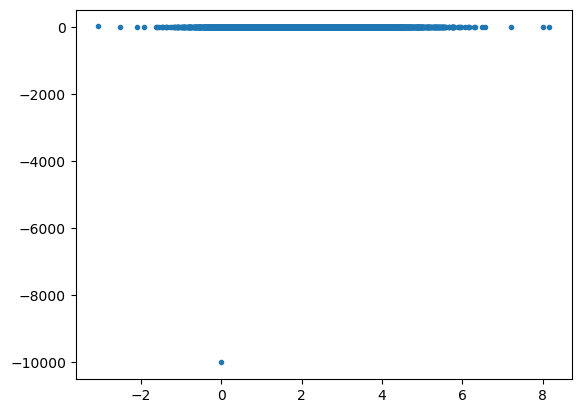

In [5]:
plt.figure()
plt.scatter(SDSSgals['ug'], SDSSgals['gr'], marker='.')
plt.show()

In [10]:
import numpy as np

outlier = np.where(SDSSgals['gr']<-8000)

In [11]:
outlier

(array([1852]),)

In [12]:
SDSSgals[1852]

ug,gr,gi,gz,petroRad_i,petroR50_i,deVAB_i
float64,float64,float64,float64,float64,float64,float64
0.0,-10017.78,-10017.15,0.0,3.623221,1.490871,0.6968368


In [13]:
df = SDSSgals.to_pandas()
df

,ug,gr,gi,gz,petroRad_i,petroR50_i,deVAB_i
0,1.121708,1.396580,2.130693,2.535936,4.519153,1.872421,0.559964
1,1.792809,1.768518,2.524124,2.907356,4.243830,1.669696,0.914420
2,1.894390,0.923239,1.339203,1.679128,6.378449,2.613452,0.914933
3,1.840790,0.890741,1.288263,1.593090,2.717706,1.217582,0.577346
4,0.514933,0.767977,1.594810,2.005058,3.370125,1.448429,0.803933
...,...,...,...,...,...,...,...
9995,2.083250,2.056517,3.051100,3.441381,2.139250,1.043615,0.776197
9996,2.878315,1.667009,2.632729,3.175478,1.681557,0.774208,0.050000
9997,1.546240,1.491131,2.490173,2.902569,3.617081,1.343076,0.732014
9998,4.397469,1.500385,2.232164,2.391920,3.757993,1.114649,0.209133


In [16]:
df = df.drop(1852)

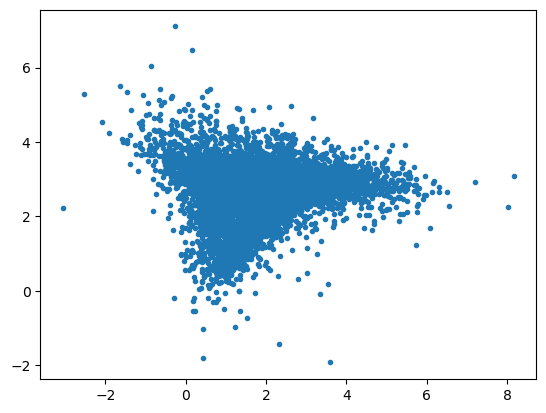

In [18]:
plt.figure()
plt.scatter(df['ug'], df['gz'], marker='.')
plt.show()

In [19]:
X = np.array(df)
X.shape

(9999, 7)

In [49]:
from sklearn.preprocessing import StandardScaler
gscaler = StandardScaler().fit(X)

X_train = gscaler.transform(X)

In [50]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps= 0.5, min_samples=110)


In [21]:
dbs

DBSCAN(min_samples=110)

In [51]:
dbs.fit(X_train)

DBSCAN(min_samples=110)

In [23]:
dbs.labels_

array([-1, -1, -1, ...,  1, -1, -1])

In [52]:
cluster_members = dbs.labels_ != -1

In [25]:
cluster_members

array([False, False, False, ...,  True, False, False])

In [53]:
outliers = dbs.labels_ == -1
outliers

array([ True, False, False, ..., False,  True,  True])

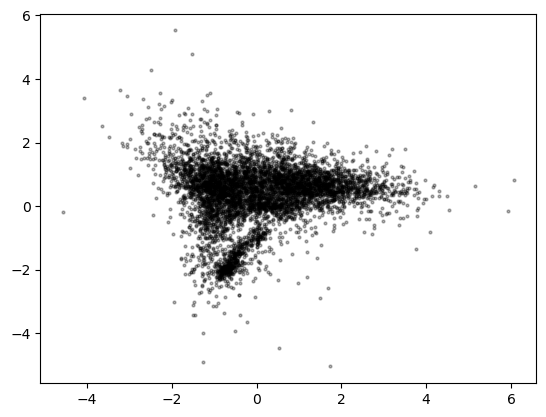

In [54]:
plt.figure()
plt.scatter(X_train[:,0][outliers], X_train[:,3][outliers],
           c = 'k',
           s = 4, alpha=0.3)

plt.show()

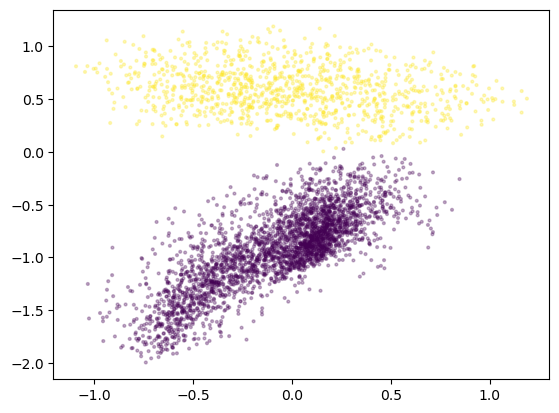

In [55]:
plt.figure()
plt.scatter(X_train[:,0][cluster_members], X_train[:,3][cluster_members],
           c = dbs.labels_[cluster_members],
           s = 4, alpha=0.3)

plt.show()

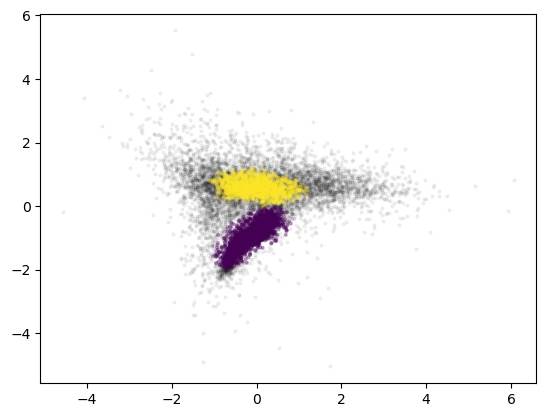

In [56]:
plt.figure()
plt.scatter(X_train[:,0][outliers], X_train[:,3][outliers],
           c = 'k',
           s = 4, alpha=0.05)
plt.scatter(X_train[:,0][cluster_members], X_train[:,3][cluster_members],
           c = dbs.labels_[cluster_members],
           s = 4, alpha=0.3)

plt.show()